In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("UNHCR-PRMN-Displacement-Dataset.xlsx")

In [4]:
df.head()

,Month End,Year Week,Current (Arrival) Region,Current (Arrival) District,Previous (Departure) Region,Previous (Departure) District,Reason,Current (Arrival) Priority Need,Number of Individuals
0,31/01/2016,201601,Awdal,Borama,Bakool,Tayeeglow,Drought related,Livelihood Support,7
1,31/01/2016,201601,Awdal,Borama,Banadir,Banadir,Drought related,Livelihood Support,7
2,31/01/2016,201602,Awdal,Borama,Banadir,Banadir,Drought related,Livelihood Support,8
3,31/01/2016,201604,Awdal,Borama,Banadir,Banadir,Drought related,Livelihood Support,5
4,31/01/2016,201604,Awdal,Borama,Banadir,Banadir,Drought related,Livelihood Support,6


In [5]:
## Renaming columns to something shorter
df.columns = ['yr_mth', 'yr_wk', 'arr_reg', 'arr_dist', 'dep_reg', 'dep_dist', 'reason', 'need', 'number_of_people']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34812 entries, 0 to 34811
Data columns (total 9 columns):
yr_mth              34812 non-null object
yr_wk               34812 non-null int64
arr_reg             34812 non-null object
arr_dist            34812 non-null object
dep_reg             34812 non-null object
dep_dist            34812 non-null object
reason              34812 non-null object
need                34812 non-null object
number_of_people    34812 non-null int64
dtypes: int64(2), object(7)
memory usage: 2.4+ MB


In [7]:
## Indexing dataframe by week by using datetime
weekparse = lambda week:  pd.to_datetime((str(week)[0:4] + '_' + str(week)[4:] + "_0"), format='%Y_%W_%w')
df['yr_wk'] = df['yr_wk'].apply(weekparse)
df.set_index('yr_wk', inplace=True)
df.head()

,yr_mth,arr_reg,arr_dist,dep_reg,dep_dist,reason,need,number_of_people
yr_wk,,,,,,,,
2016-01-10,31/01/2016,Awdal,Borama,Bakool,Tayeeglow,Drought related,Livelihood Support,7
2016-01-10,31/01/2016,Awdal,Borama,Banadir,Banadir,Drought related,Livelihood Support,7
2016-01-17,31/01/2016,Awdal,Borama,Banadir,Banadir,Drought related,Livelihood Support,8
2016-01-31,31/01/2016,Awdal,Borama,Banadir,Banadir,Drought related,Livelihood Support,5
2016-01-31,31/01/2016,Awdal,Borama,Banadir,Banadir,Drought related,Livelihood Support,6


In [8]:
## Creating year, month columns
df['yr'] = df.index.year
df['mth'] = df.index.month_name()
df['mth_idx'] = df.index.month

In [9]:
df = df.drop(columns=['yr_mth'])
df.head()

,arr_reg,arr_dist,dep_reg,dep_dist,reason,need,number_of_people,yr,mth,mth_idx
yr_wk,,,,,,,,,,
2016-01-10,Awdal,Borama,Bakool,Tayeeglow,Drought related,Livelihood Support,7,2016,January,1
2016-01-10,Awdal,Borama,Banadir,Banadir,Drought related,Livelihood Support,7,2016,January,1
2016-01-17,Awdal,Borama,Banadir,Banadir,Drought related,Livelihood Support,8,2016,January,1
2016-01-31,Awdal,Borama,Banadir,Banadir,Drought related,Livelihood Support,5,2016,January,1
2016-01-31,Awdal,Borama,Banadir,Banadir,Drought related,Livelihood Support,6,2016,January,1


In [10]:
## setting up categories
except_this_column = ['number_of_people']
for col in df.columns:
    if col not in except_this_column:
        df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34812 entries, 2016-01-10 to 2019-07-28
Data columns (total 10 columns):
arr_reg             34812 non-null category
arr_dist            34812 non-null category
dep_reg             34812 non-null category
dep_dist            34812 non-null category
reason              34812 non-null category
need                34812 non-null category
number_of_people    34812 non-null int64
yr                  34812 non-null category
mth                 34812 non-null category
mth_idx             34812 non-null category
dtypes: category(9), int64(1)
memory usage: 859.2 KB


In [11]:
unique_category_counts = pd.DataFrame.from_records([(col, df[col].nunique()) for col in df.columns if col not in except_this_column],
                              columns=['column', 'unique_entry_values']).sort_values(by=['unique_entry_values'])

In [12]:
unique_category_counts

,column,unique_entry_values
4,reason,4
6,yr,4
5,need,9
7,mth,12
8,mth_idx,12
0,arr_reg,18
2,dep_reg,18
1,arr_dist,76
3,dep_dist,77


In [13]:
numbers_by_week = df.groupby(df.index).aggregate({'number_of_people': 'sum'})
numbers_by_week.head(10)

,number_of_people
yr_wk,
2016-01-03,319
2016-01-10,6834
2016-01-17,5678
2016-01-24,6006
2016-01-31,2176
2016-02-07,1510
2016-02-14,1490
2016-02-21,3633
2016-02-28,1057


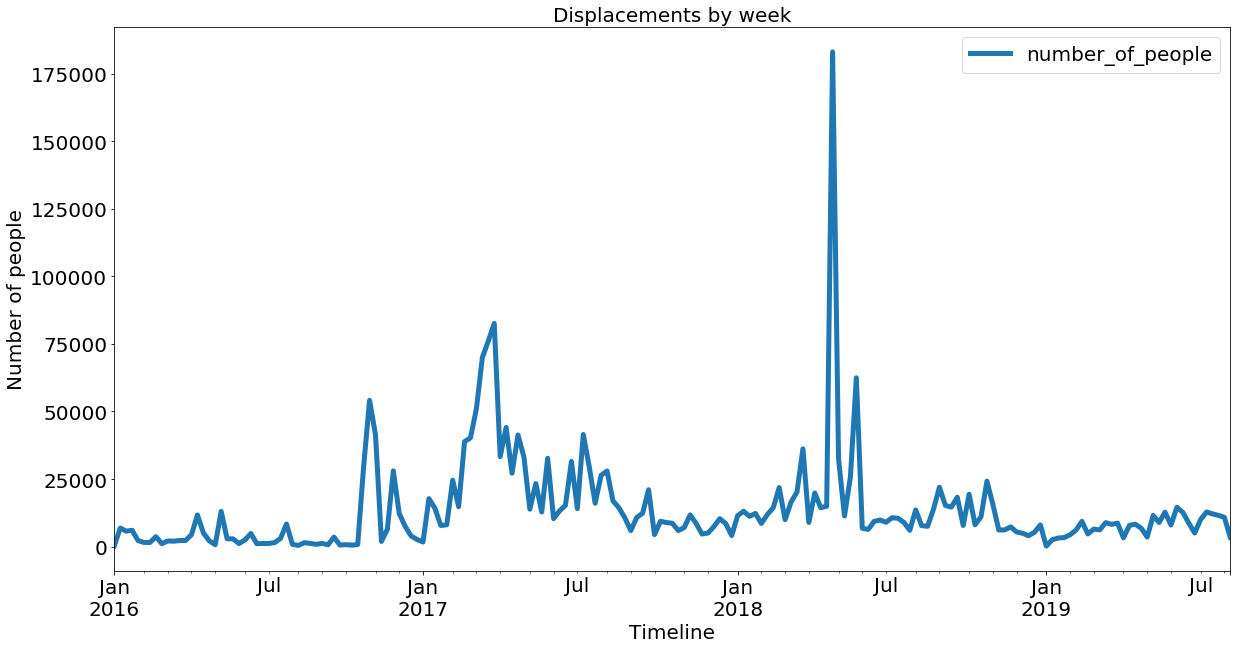

In [14]:
## Number of displacements in Somalia by the week
numbers_by_week.plot(figsize=(20, 10), fontsize=20, linewidth=5)
plt.xlabel('Timeline', fontsize=20)
#plt.xticks(rotation=45)
plt.ylabel('Number of people', fontsize=20)
plt.title('Displacements by week', fontsize=20)
plt.legend(fontsize=20)

## Reasons for displacement and Immediate need

In [15]:
numbers_dep_reg = df.groupby(['dep_reg']).aggregate({'number_of_people': 'sum'}).sort_values('number_of_people', ascending=False).unstack()
numbers_reasons_dep_reg = df.groupby(['reason', 'dep_reg']).aggregate({'number_of_people': 'sum'}).sort_values('number_of_people', ascending=False).unstack()

numbers_arr_reg = df.groupby(['arr_reg']).aggregate({'number_of_people': 'sum'}).sort_values('number_of_people', ascending=False).unstack()
numbers_need_arr_reg = df.groupby(['need', 'arr_reg']).aggregate({'number_of_people': 'sum'}).sort_values('number_of_people', ascending=False).unstack()

In [16]:
numbers_dep_reg.reset_index(level=0, drop='level_0')

dep_reg
Lower Shabelle     687054
Bay                382408
Bakool             213195
Hiraan             204404
Mudug              165387
Sool               159838
Middle Shabelle    125657
Gedo               110027
Togdheer            91238
Galgaduud           88662
Sanaag              83879
Bari                53445
Banadir             50817
Lower Juba          47505
Middle Juba         36178
Awdal               26499
Woqooyi Galbeed     19943
Nugaal              16095
dtype: int64

Text(0.5, 1.0, 'Displacements by departure region')

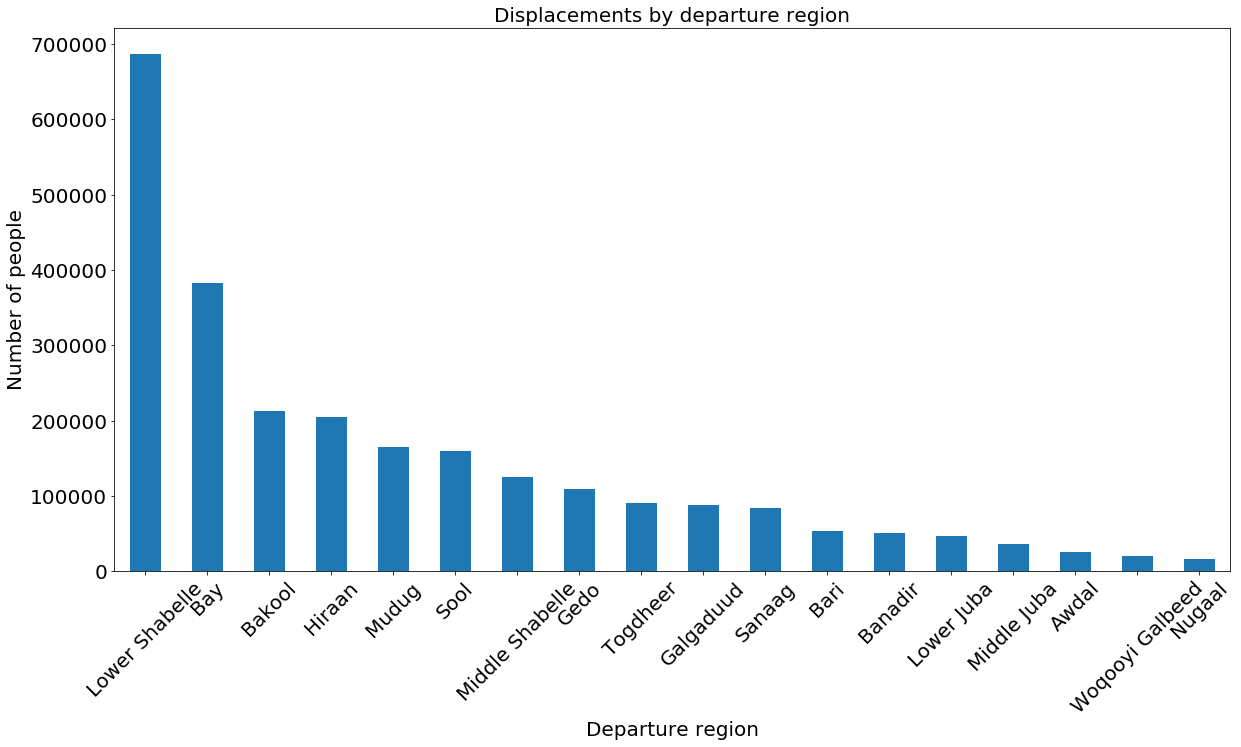

In [17]:
numbers_dep_reg['number_of_people'].plot(kind='bar',figsize=(20, 10), fontsize=20)
plt.xlabel('Departure region', fontsize=20)
plt.xticks(rotation=45)
plt.ylabel('Number of people', fontsize=20)
plt.title('Displacements by departure region', fontsize=20)

In [18]:
## Looking at reasons for leaving by departure region
numbers_reasons_dep_reg

number_of_people                                        \
dep_reg                        Awdal    Bakool  Banadir     Bari       Bay   
reason                                                                       
Conflict/Insecurity            553.0   31796.0  16897.0   6472.0   30005.0   
Drought related              18273.0  179945.0  18120.0  43750.0  348948.0   
Flood                         3525.0     690.0    588.0    643.0      56.0   
Other                         4148.0     764.0  15212.0   2580.0    3399.0   

                                                                            \
dep_reg             Galgaduud     Gedo    Hiraan Lower Juba Lower Shabelle   
reason                                                                       
Conflict/Insecurity   43753.0  16070.0   19454.0    23933.0       467113.0   
Drought related       39499.0  40526.0   32122.0    17025.0       209089.0   
Flood                  5172.0  52111.0  152644.0     2307.0         8993.0   
Other                   238.0   1320.0     184.0     4240.0         1859.0   

                                                                             \
dep_reg             Middle Juba Middle Shabelle     Mudug   Nugaal   Sanaag   
reason                                                                        
Conflict/Insecurity      7264.0         65075.0   23652.0     91.0   8063.0   
Drought related         11893.0         11735.0  130310.0  14370.0  74294.0   
Flood                   16028.0         48360.0      15.0      NaN    271.0   
Other                     993.0           487.0   11410.0   1634.0   1251.0   

                                                        
dep_reg                  Sool Togdheer Woqooyi Galbeed  
reason                                                  
Conflict/Insecurity   41516.0  22364.0            23.0  
Drought related      107377.0  54562.0         10851.0  
Flood                  5584.0     38.0           438.0  
Other                  5361.0  14274.0          8631.0

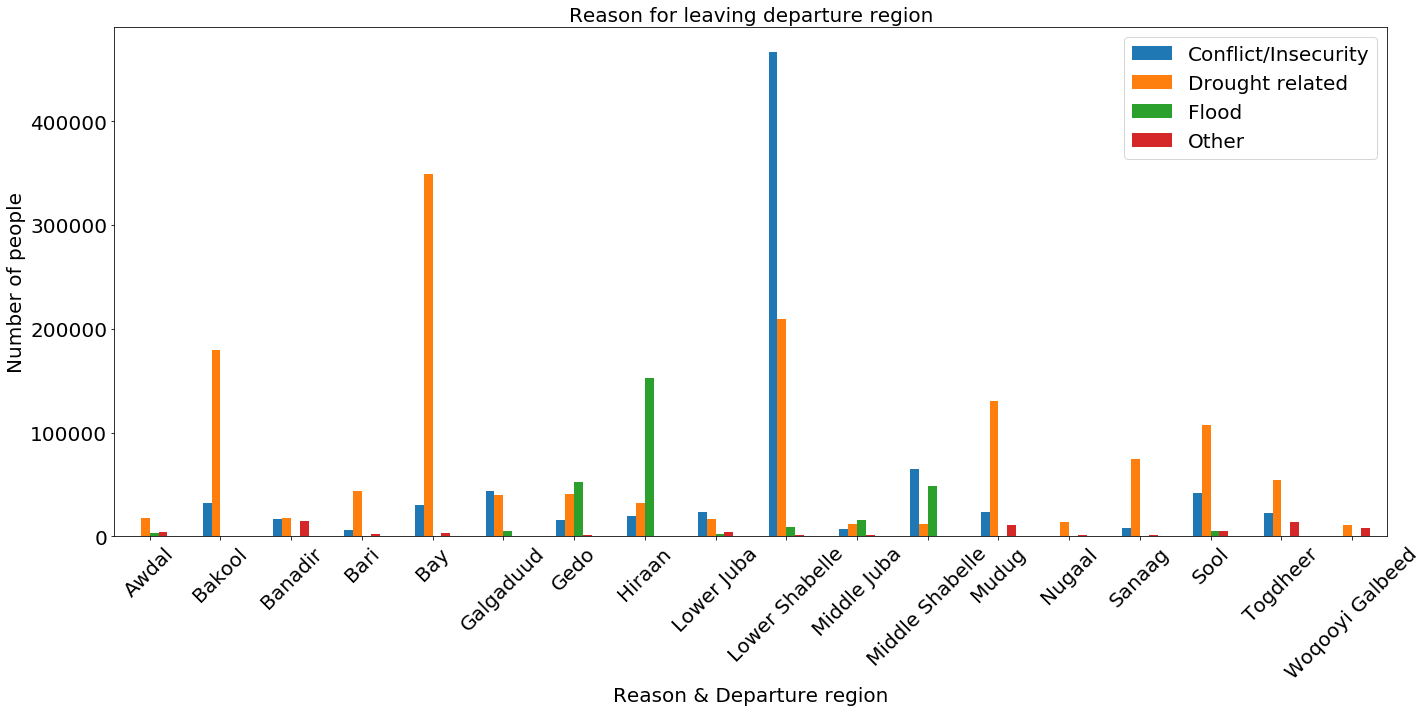

In [19]:
## Visualizing Reason for leaving departure region
numbers_reasons_dep_reg['number_of_people'].T.plot(kind='bar', align='center', figsize=(20, 10), fontsize=20)
plt.xlabel('Reason & Departure region', fontsize=20)
plt.xticks(rotation=45)
plt.ylabel('Number of people', fontsize=20)
plt.title('Reason for leaving departure region', fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()

In [20]:
numbers_arr_reg.reset_index(level=0, drop='level_0')

arr_reg
Banadir            590171
Bay                383806
Lower Shabelle     214811
Hiraan             196317
Mudug              167734
Sool               149711
Bakool             142378
Gedo               110059
Middle Shabelle     96038
Galgaduud           86779
Sanaag              84371
Togdheer            74149
Bari                63128
Lower Juba          56121
Woqooyi Galbeed     51498
Middle Juba         46421
Awdal               35559
Nugaal              13180
dtype: int64

Text(0.5, 1.0, 'Displacements by arrival region')

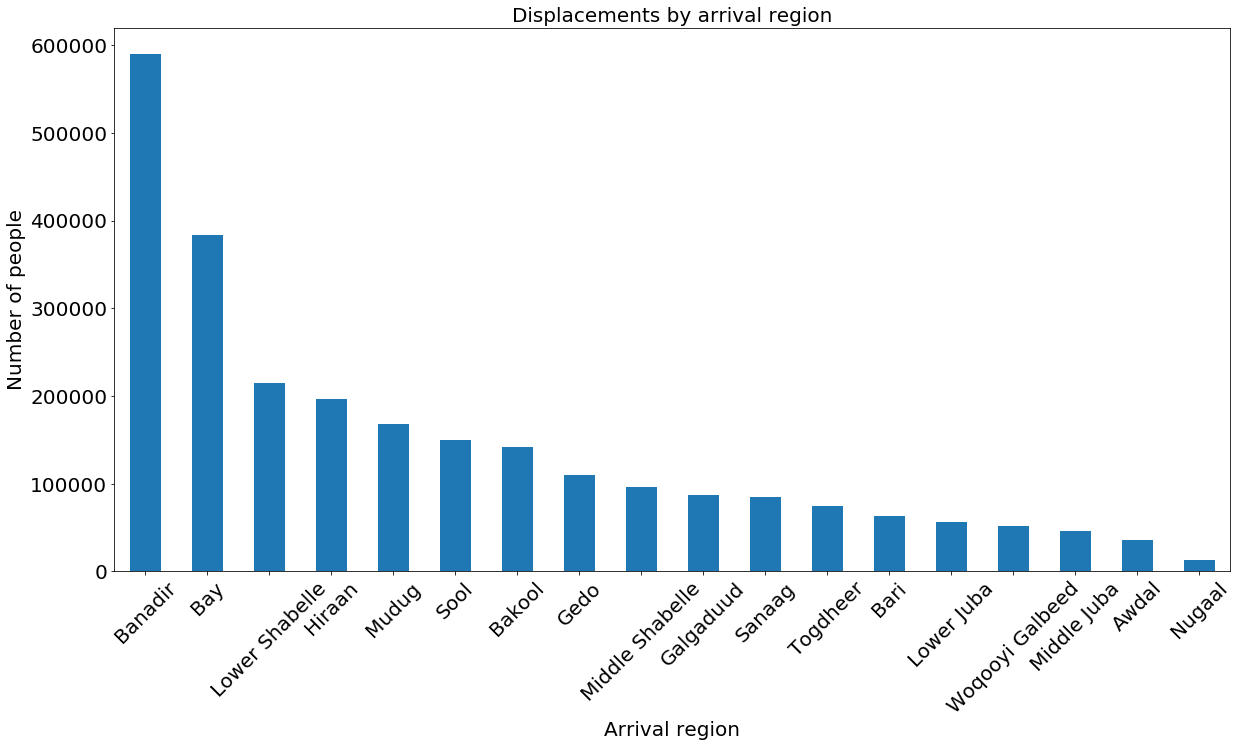

In [21]:
## Plotting Arrival region numbers
numbers_arr_reg['number_of_people'].plot(kind='bar',figsize=(20, 10), fontsize=20)
plt.xlabel('Arrival region', fontsize=20)
plt.xticks(rotation=45)
plt.ylabel('Number of people', fontsize=20)
plt.title('Displacements by arrival region', fontsize=20)

In [22]:
## Looking at immediate needs by arrival region
numbers_need_arr_reg

number_of_people                                        \
arr_reg                       Awdal   Bakool   Banadir     Bari       Bay   
need                                                                        
Food                         7601.0  84536.0  251890.0  19153.0  216031.0   
Health                        918.0   2726.0    3150.0   3413.0   12394.0   
Humanitarian Aid              750.0    464.0   37361.0   2657.0     457.0   
Livelihood Support          16460.0  18413.0  104511.0  26054.0  107519.0   
Other                         247.0  23311.0   53436.0   1785.0   15244.0   
Protection                     14.0   2896.0   11774.0    124.0     744.0   
Shelter                      5735.0   6871.0  100043.0   7812.0   29709.0   
Transport                     440.0     27.0     231.0     31.0       NaN   
Water                        3394.0   3134.0   27775.0   2099.0    1708.0   

                                                                           \
arr_reg            Galgaduud     Gedo    Hiraan Lower Juba Lower Shabelle   
need                                                                        
Food                 62971.0  68033.0   71561.0    24524.0        10781.0   
Health                  22.0    926.0      18.0     1226.0          892.0   
Humanitarian Aid         NaN    409.0       NaN      304.0        11834.0   
Livelihood Support     385.0  11141.0     324.0     3097.0       103633.0   
Other                15308.0  18707.0    8248.0     3553.0        19288.0   
Protection              83.0   3070.0       NaN      714.0        54820.0   
Shelter               1766.0   5799.0  109506.0    22635.0        12899.0   
Transport               48.0    609.0    4620.0        6.0           49.0   
Water                 6196.0   1365.0    2040.0       62.0          615.0   

                                                                          \
arr_reg            Middle Juba Middle Shabelle    Mudug  Nugaal   Sanaag   
need                                                                       
Food                   31078.0         12657.0  25064.0  3824.0  16602.0   
Health                  1432.0            66.0   6530.0   209.0   7198.0   
Humanitarian Aid          24.0             9.0   3167.0    11.0   1796.0   
Livelihood Support      4157.0         18586.0  87438.0  5971.0  18519.0   
Other                   2817.0         17710.0   3152.0   485.0   2601.0   
Protection               175.0         12779.0  17340.0   294.0   4842.0   
Shelter                 5995.0         31149.0  14028.0  1117.0   3784.0   
Transport                316.0            11.0   6388.0     NaN   1800.0   
Water                    427.0          3071.0   4627.0  1269.0  27229.0   

                                                      
arr_reg                Sool Togdheer Woqooyi Galbeed  
need                                                  
Food                66975.0  13466.0         16628.0  
Health               5773.0   5843.0           853.0  
Humanitarian Aid       26.0    667.0          7941.0  
Livelihood Support   7507.0  20863.0          7988.0  
Other                3273.0   1173.0         12393.0  
Protection            168.0    829.0           145.0  
Shelter             15322.0  10283.0           657.0  
Transport            3274.0   1517.0           177.0  
Water               47393.0  19508.0          4716.0

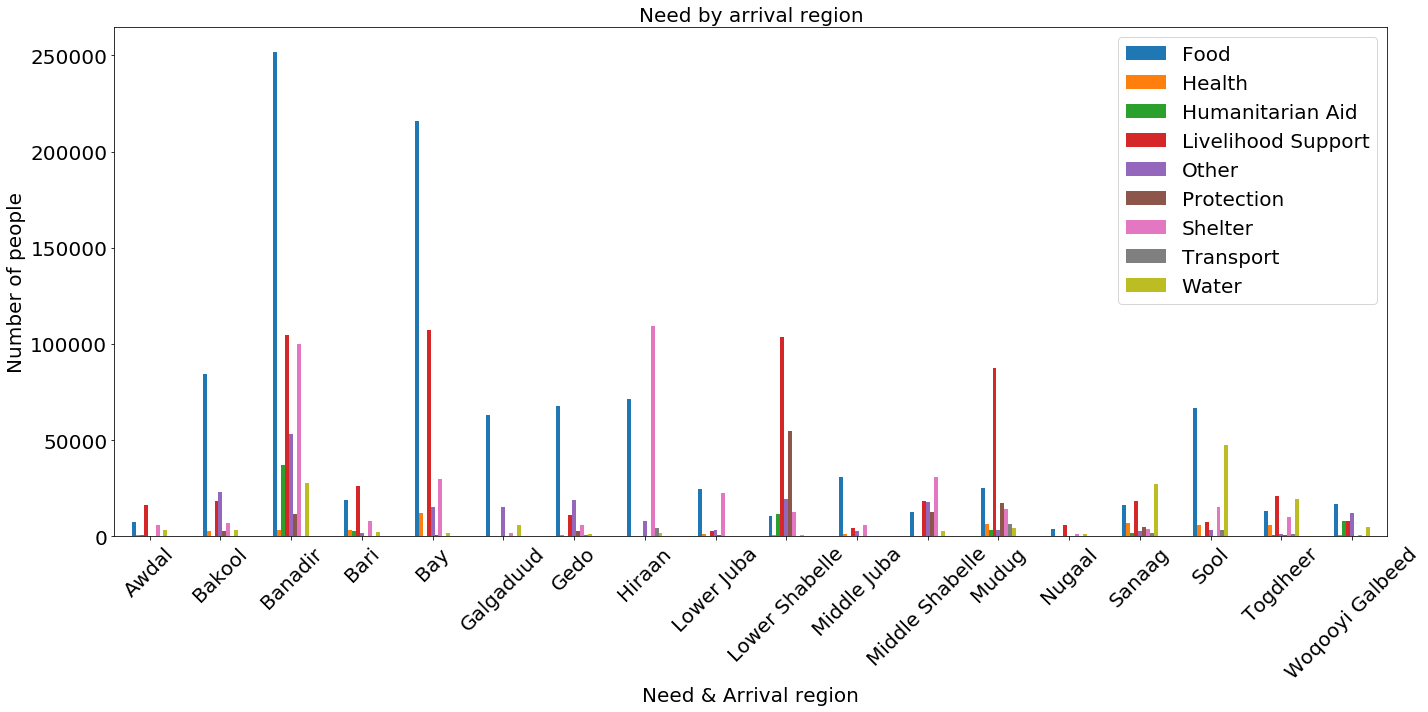

In [23]:
## Plotting Immediate need at arrival region
numbers_need_arr_reg['number_of_people'].T.plot(kind='bar',figsize=(20, 10), fontsize=20)
plt.xlabel('Need & Arrival region', fontsize=20)
plt.xticks(rotation=45)
plt.ylabel('Number of people', fontsize=20)
plt.title('Need by arrival region', fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()

In [24]:
## Looking at departure / arrival reion numbers by year
numbers_yr_dep_reg = df.groupby(['yr', 'dep_reg']).aggregate({'number_of_people': 'sum'}).sort_values('number_of_people', ascending=False).unstack()
numbers_yr_arr_reg = df.groupby(['yr', 'arr_reg']).aggregate({'number_of_people': 'sum'}).sort_values('number_of_people', ascending=False).unstack()

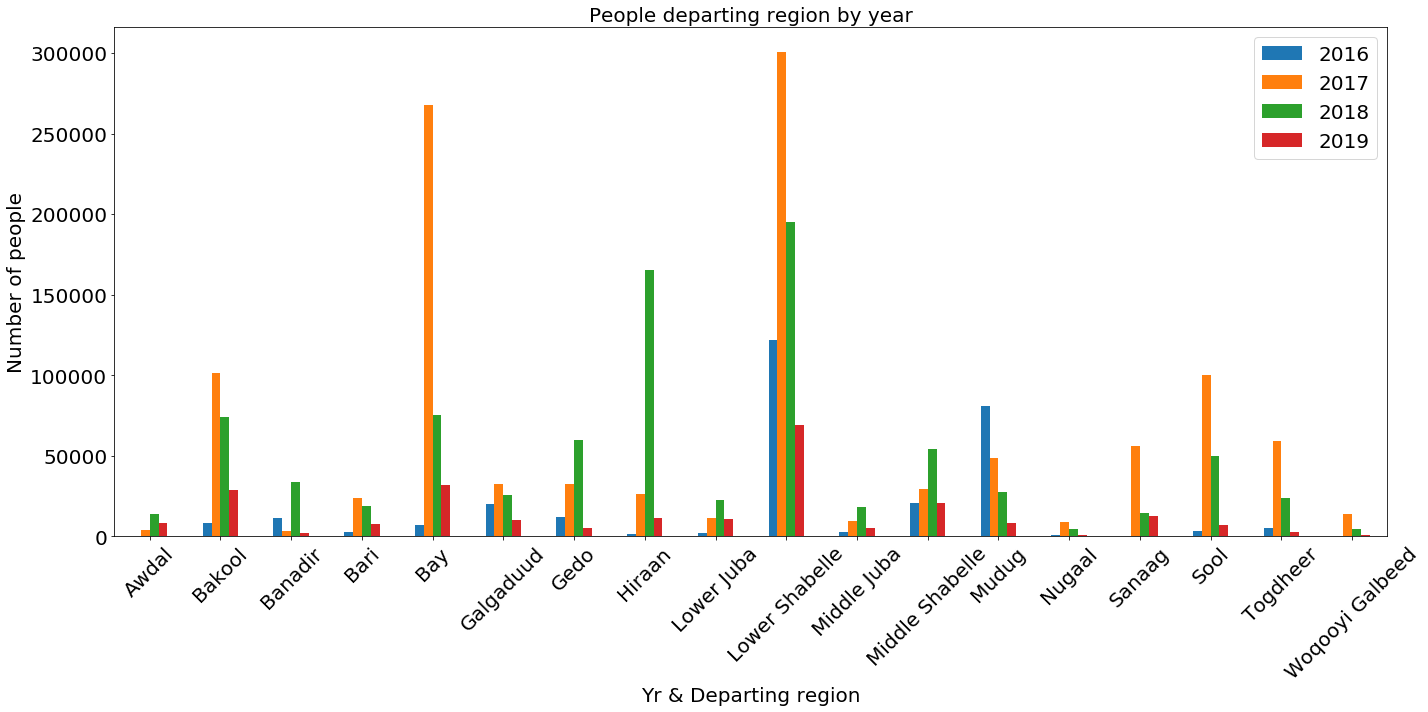

In [25]:
## People departing by year
numbers_yr_dep_reg['number_of_people'].T.plot(kind='bar',figsize=(20, 10), fontsize=20)
plt.xlabel('Yr & Departing region', fontsize=20)
plt.xticks(rotation=45)
plt.ylabel('Number of people', fontsize=20)
plt.title('People departing region by year', fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()

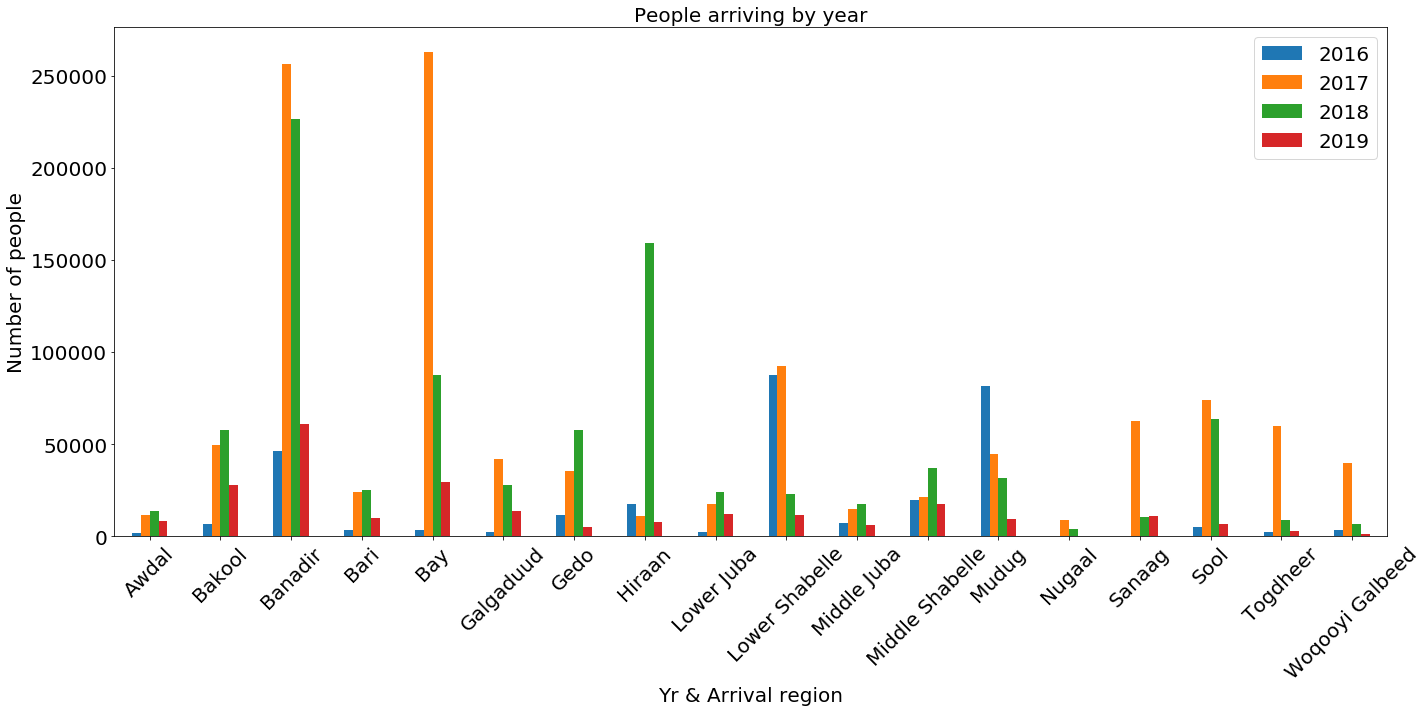

In [26]:
## People arriving by year
numbers_yr_arr_reg['number_of_people'].T.plot(kind='bar',figsize=(20, 10), fontsize=20)
plt.xlabel('Yr & Arrival region', fontsize=20)
plt.xticks(rotation=45)
plt.ylabel('Number of people', fontsize=20)
plt.title('People arriving by year', fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()

In [27]:
numbers_mth_reason = df.groupby(['mth', 'reason']).aggregate({'number_of_people': 'sum'}).sort_values('number_of_people').unstack()
numbers_mth_need = df.groupby(['mth', 'need']).aggregate({'number_of_people': 'sum'}).unstack()
numbers_yr_reason = df.groupby(['yr', 'reason']).aggregate({'number_of_people': 'sum'}).unstack()
numbers_yr_need = df.groupby(['yr', 'need']).aggregate({'number_of_people': 'sum'}).unstack()

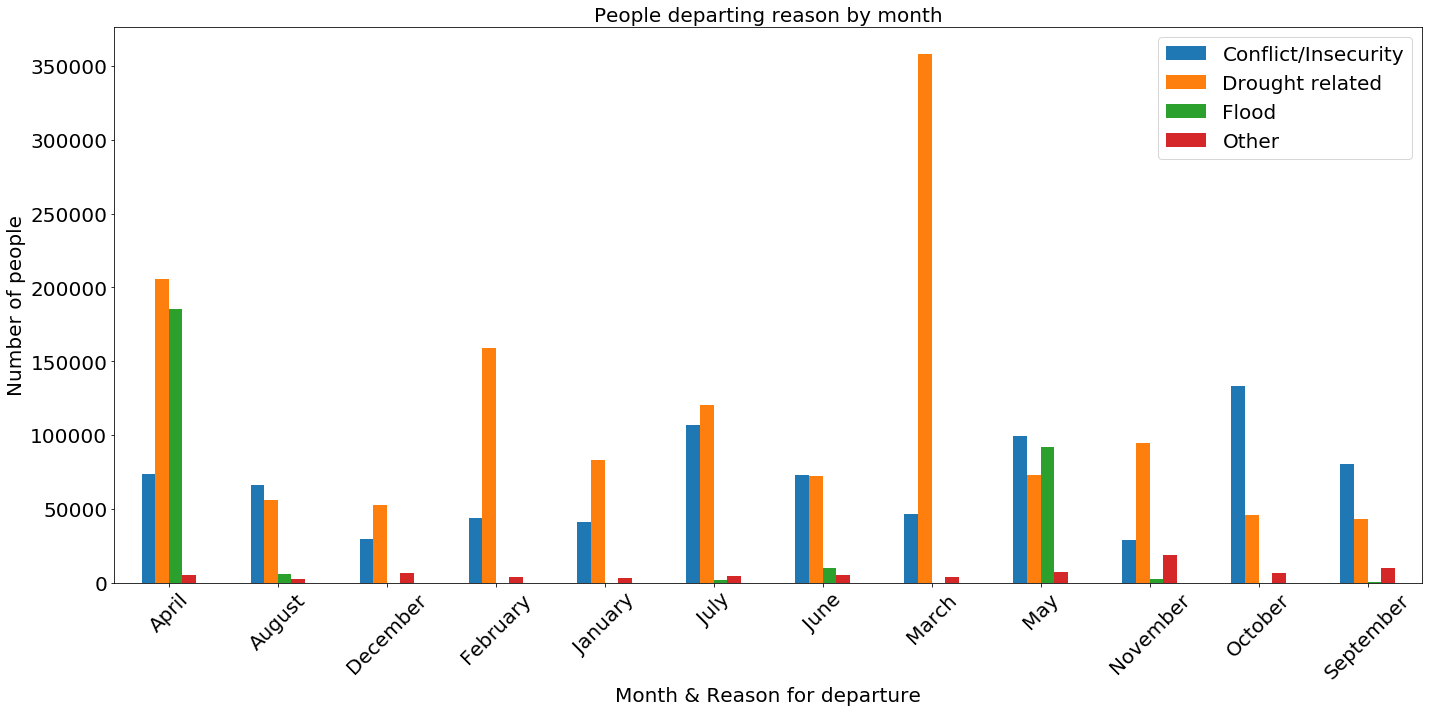

In [28]:
## Reasons people move by monthly average 
numbers_mth_reason['number_of_people'].plot(kind='bar',figsize=(20, 10), fontsize=20)
plt.xlabel('Month & Reason for departure', fontsize=20)
plt.xticks(rotation=45)
plt.ylabel('Number of people', fontsize=20)
plt.title('People departing reason by month', fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()

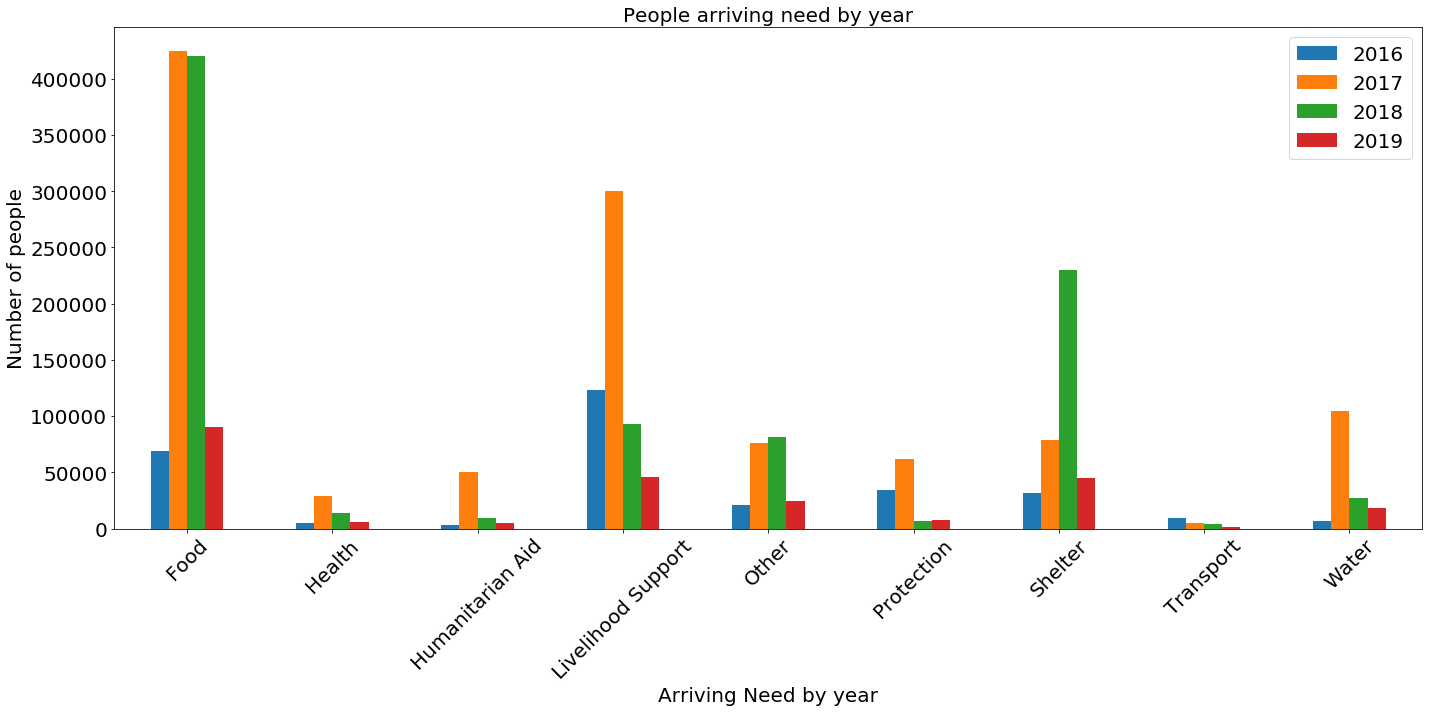

In [29]:
## What people arriving need by year
numbers_yr_need['number_of_people'].T.plot(kind='bar',figsize=(20, 10), fontsize=20)
plt.xlabel('Arriving Need by year', fontsize=20)
plt.xticks(rotation=45)
plt.ylabel('Number of people', fontsize=20)
plt.title('People arriving need by year', fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()

In [30]:
def crosscorr(x, y, lag=0):
    return x.corr(y.shift(lag))

In [31]:
## Removing the timeframe of the two major events in the data and checking for patterns
from scipy import stats
numbers_by_week_outlier_removed = numbers_by_week[(np.abs(stats.zscore(numbers_by_week)) < 3)]

Text(0.5, 1.0, 'Displacements by week (Blue: outliers removed)')

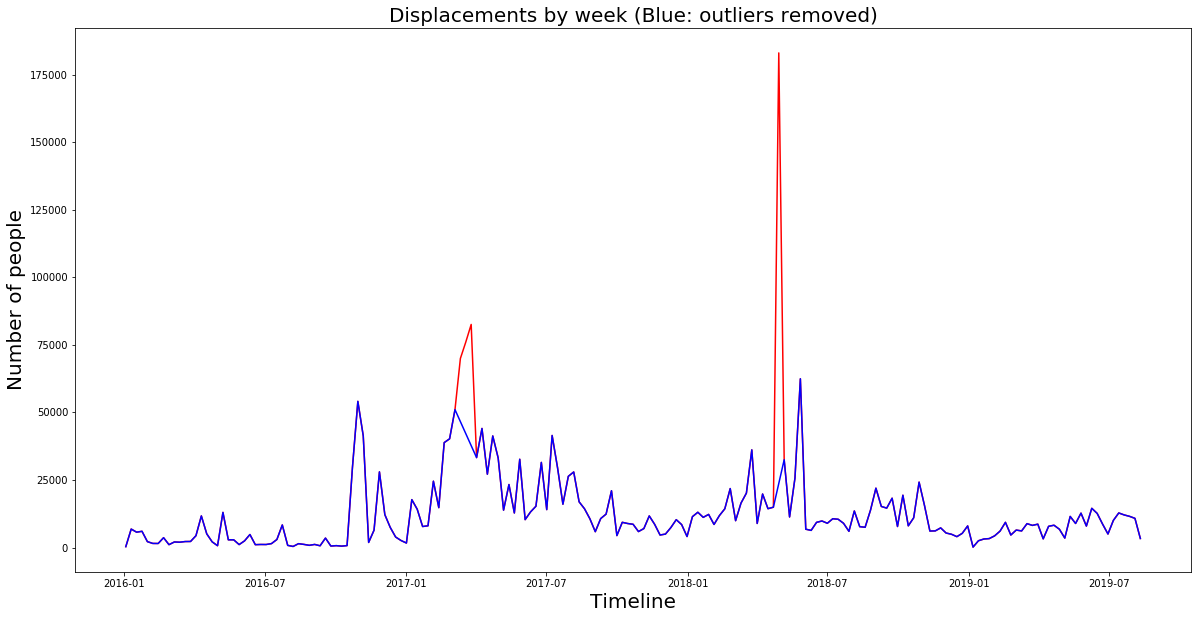

In [32]:
## Number of displacements in Somalia by the week
plt.figure(figsize=(20, 10))
plt.plot(numbers_by_week, color='red')
plt.plot(numbers_by_week_outlier_removed, color='blue')
plt.xlabel('Timeline', fontsize=20)
#plt.xticks(rotation=45)
plt.ylabel('Number of people', fontsize=20)
plt.title('Displacements by week (Blue: outliers removed)', fontsize=20)
#plt.show()

In [33]:
## Creating new dataframe numbers with outliers removed
df_new = df[(np.abs(stats.zscore(df['number_of_people'])) < 3)]
df_new.head()

,arr_reg,arr_dist,dep_reg,dep_dist,reason,need,number_of_people,yr,mth,mth_idx
yr_wk,,,,,,,,,,
2016-01-10,Awdal,Borama,Bakool,Tayeeglow,Drought related,Livelihood Support,7,2016,January,1
2016-01-10,Awdal,Borama,Banadir,Banadir,Drought related,Livelihood Support,7,2016,January,1
2016-01-17,Awdal,Borama,Banadir,Banadir,Drought related,Livelihood Support,8,2016,January,1
2016-01-31,Awdal,Borama,Banadir,Banadir,Drought related,Livelihood Support,5,2016,January,1
2016-01-31,Awdal,Borama,Banadir,Banadir,Drought related,Livelihood Support,6,2016,January,1


In [34]:
numbers_by_week_wo_outliers = df_new.groupby(df_new.index).aggregate({'number_of_people': 'sum'})
numbers_by_week_wo_outliers.head(10)

,number_of_people
yr_wk,
2016-01-03,319
2016-01-10,1596
2016-01-17,2698
2016-01-24,6006
2016-01-31,2176
2016-02-07,1510
2016-02-14,1490
2016-02-21,3633
2016-02-28,1057


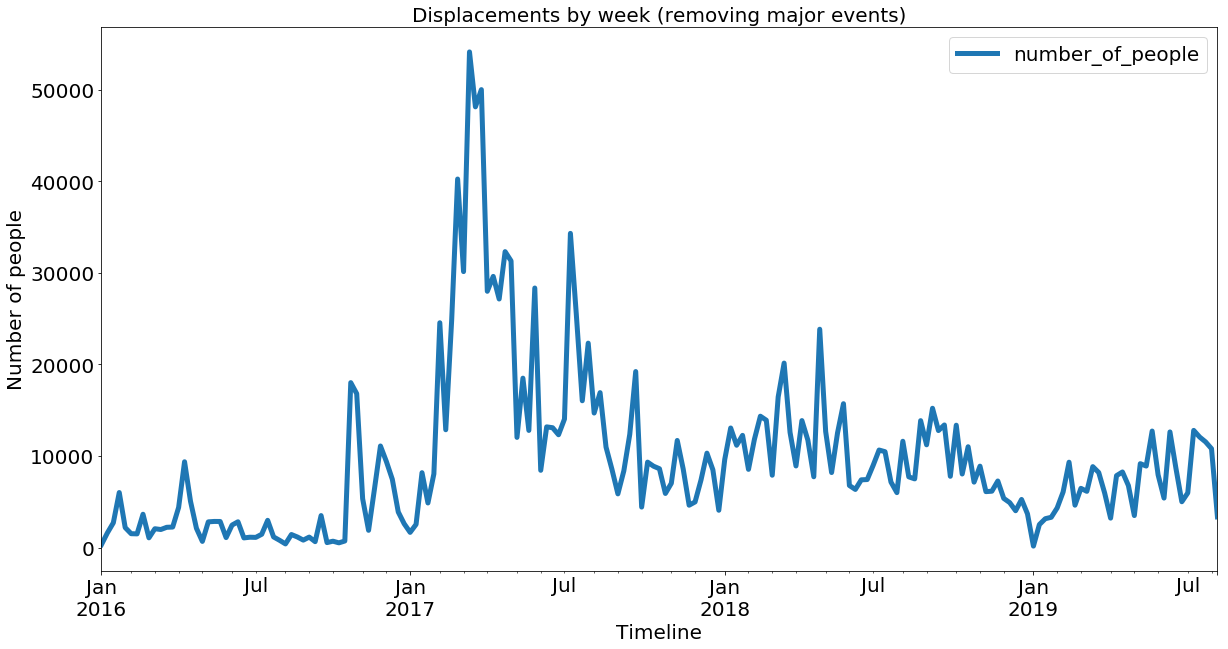

In [35]:
## Number of displacements in Somalia by the week
numbers_by_week_wo_outliers.plot(figsize=(20, 10), fontsize=20, linewidth=5)
plt.xlabel('Timeline', fontsize=20)
#plt.xticks(rotation=45)
plt.ylabel('Number of people', fontsize=20)
plt.title('Displacements by week (removing major events)', fontsize=20)
plt.legend(fontsize=20)

In [36]:
numbers_wo_dep_reg = df_new.groupby(['dep_reg']).aggregate({'number_of_people': 'sum'}).sort_values('number_of_people', ascending=False).unstack()
numbers_wo_reasons_dep_reg = df_new.groupby(['reason', 'dep_reg']).aggregate({'number_of_people': 'sum'}).sort_values('number_of_people', ascending=False).unstack()

In [37]:
numbers_wo_dep_reg.reset_index(level=0, drop='level_0'), numbers_dep_reg.reset_index(level=0, drop='level_0')

(dep_reg
 Lower Shabelle     486793
 Bay                364800
 Bakool             211395
 Mudug              110582
 Sool                82134
 Sanaag              75695
 Togdheer            66369
 Middle Shabelle     61660
 Gedo                55804
 Bari                53445
 Galgaduud           47700
 Lower Juba          44385
 Hiraan              41779
 Middle Juba         36178
 Banadir             24214
 Awdal               22869
 Woqooyi Galbeed     15803
 Nugaal              14295
 dtype: int64, dep_reg
 Lower Shabelle     687054
 Bay                382408
 Bakool             213195
 Hiraan             204404
 Mudug              165387
 Sool               159838
 Middle Shabelle    125657
 Gedo               110027
 Togdheer            91238
 Galgaduud           88662
 Sanaag              83879
 Bari                53445
 Banadir             50817
 Lower Juba          47505
 Middle Juba         36178
 Awdal               26499
 Woqooyi Galbeed     19943
 Nugaal              16

Text(0.5, 1.0, 'Displacements by departure region')

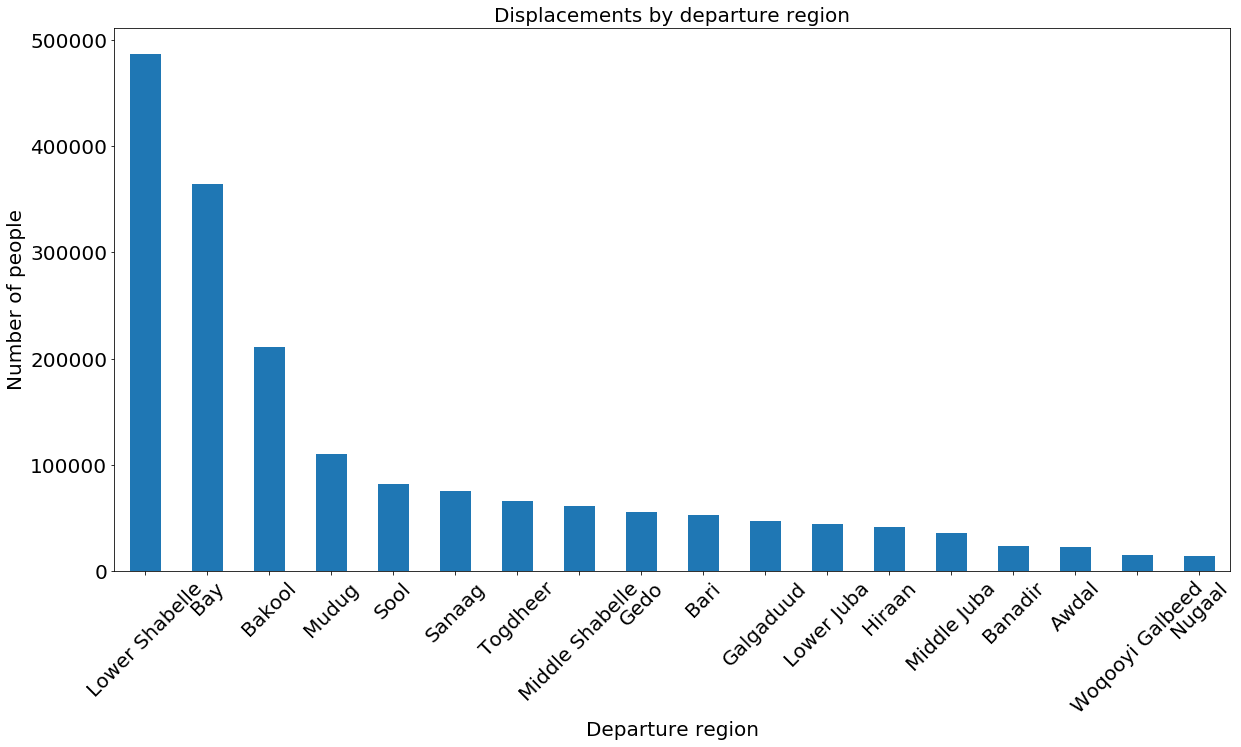

In [38]:
numbers_wo_dep_reg['number_of_people'].plot(kind='bar',figsize=(20, 10), fontsize=20)
plt.xlabel('Departure region', fontsize=20)
plt.xticks(rotation=45)
plt.ylabel('Number of people', fontsize=20)
plt.title('Displacements by departure region', fontsize=20)

In [39]:
## Looking at reasons for leaving by departure region
numbers_wo_reasons_dep_reg

number_of_people                                        \
dep_reg                        Awdal    Bakool  Banadir     Bari       Bay   
reason                                                                       
Conflict/Insecurity            553.0   29996.0   5713.0   6472.0   30005.0   
Drought related              16461.0  179945.0  11455.0  43750.0  331340.0   
Flood                         1707.0     690.0    588.0    643.0      56.0   
Other                         4148.0     764.0   6458.0   2580.0    3399.0   

                                                                           \
dep_reg             Galgaduud     Gedo   Hiraan Lower Juba Lower Shabelle   
reason                                                                      
Conflict/Insecurity   23443.0  13090.0   6233.0    20813.0       364959.0   
Drought related       23659.0  34689.0  26572.0    17025.0       110982.0   
Flood                   360.0   6705.0   8790.0     2307.0         8993.0   
Other                   238.0   1320.0    184.0     4240.0         1859.0   

                                                                            \
dep_reg             Middle Juba Middle Shabelle    Mudug   Nugaal   Sanaag   
reason                                                                       
Conflict/Insecurity      7264.0         28940.0  19092.0     91.0   8063.0   
Drought related         11893.0         11735.0  84923.0  12570.0  66110.0   
Flood                   16028.0         20498.0     15.0      NaN    271.0   
Other                     993.0           487.0   6552.0   1634.0   1251.0   

                                                       
dep_reg                 Sool Togdheer Woqooyi Galbeed  
reason                                                 
Conflict/Insecurity  10396.0   5360.0            23.0  
Drought related      65593.0  46697.0         10851.0  
Flood                  784.0     38.0           438.0  
Other                 5361.0  14274.0          4491.0

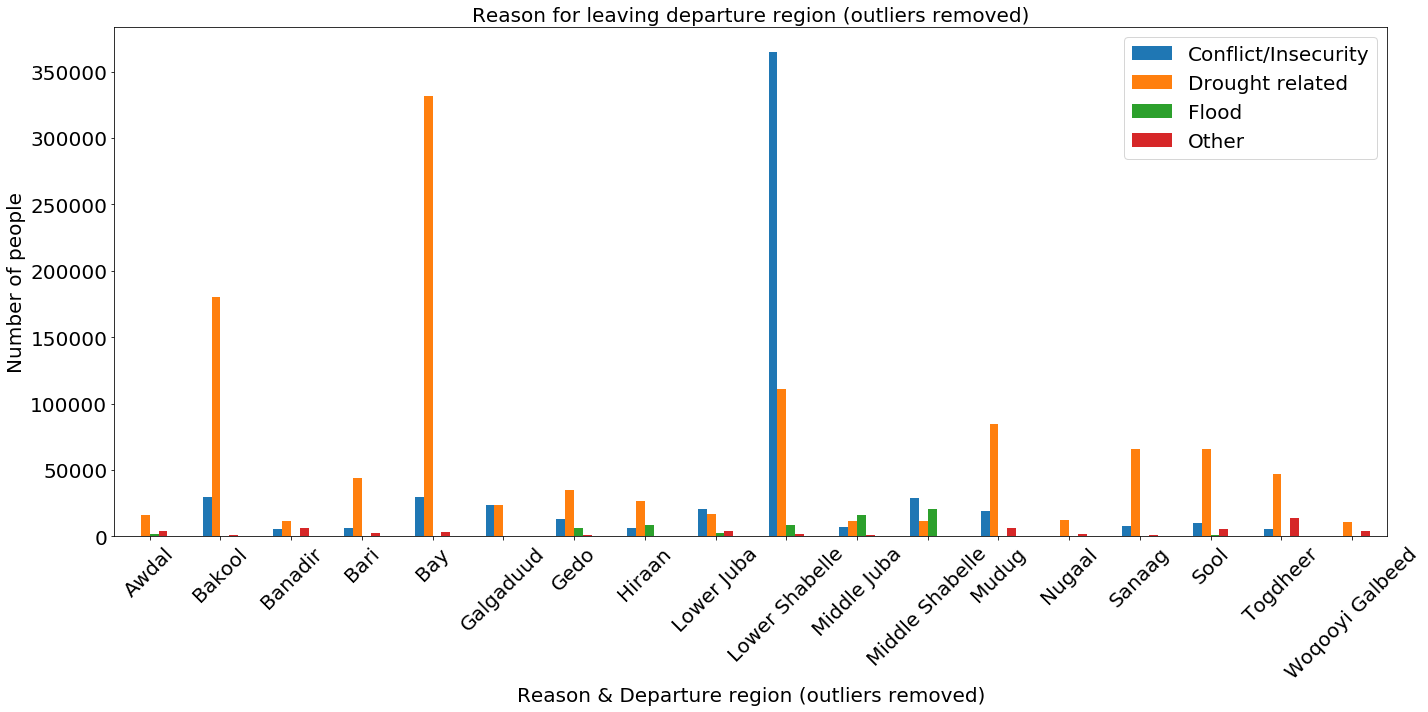

In [40]:
## Visualizing Reason for leaving departure region
numbers_wo_reasons_dep_reg['number_of_people'].T.plot(kind='bar', align='center', figsize=(20, 10), fontsize=20)
plt.xlabel('Reason & Departure region (outliers removed)', fontsize=20)
plt.xticks(rotation=45)
plt.ylabel('Number of people', fontsize=20)
plt.title('Reason for leaving departure region (outliers removed)', fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()

In [41]:
## Looking at departure / arrival reion numbers by year
numbers_wo_yr_dep_reg = df_new.groupby(['yr', 'dep_reg']).aggregate({'number_of_people': 'sum'}).sort_values('number_of_people', ascending=False).unstack()

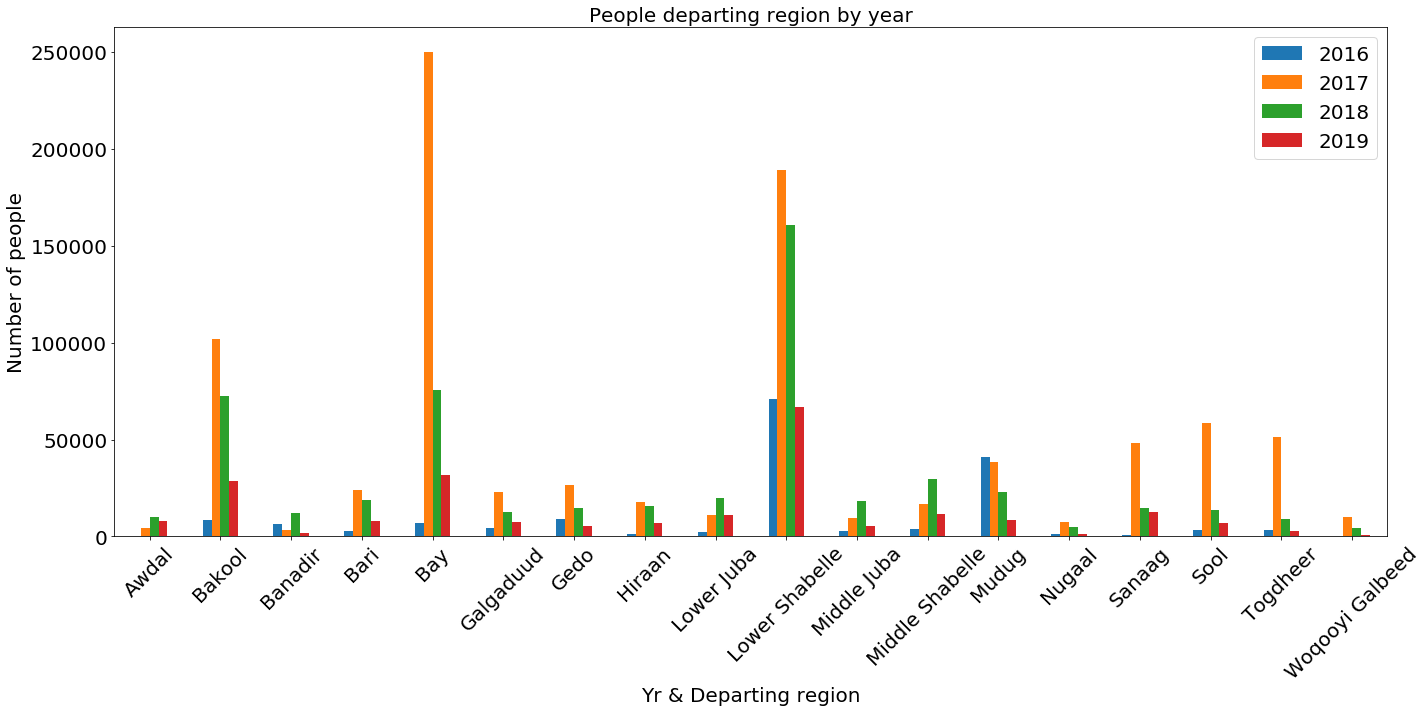

In [42]:
## People departing by year
numbers_wo_yr_dep_reg['number_of_people'].T.plot(kind='bar',figsize=(20, 10), fontsize=20)
plt.xlabel('Yr & Departing region', fontsize=20)
plt.xticks(rotation=45)
plt.ylabel('Number of people', fontsize=20)
plt.title('People departing region by year', fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()

In [43]:
numbers_wo_mth_reason = df_new.groupby(['mth', 'reason']).aggregate({'number_of_people': 'sum'}).sort_values('number_of_people').unstack()
numbers_wo_yr_reason = df_new.groupby(['yr', 'reason']).aggregate({'number_of_people': 'sum'}).unstack()

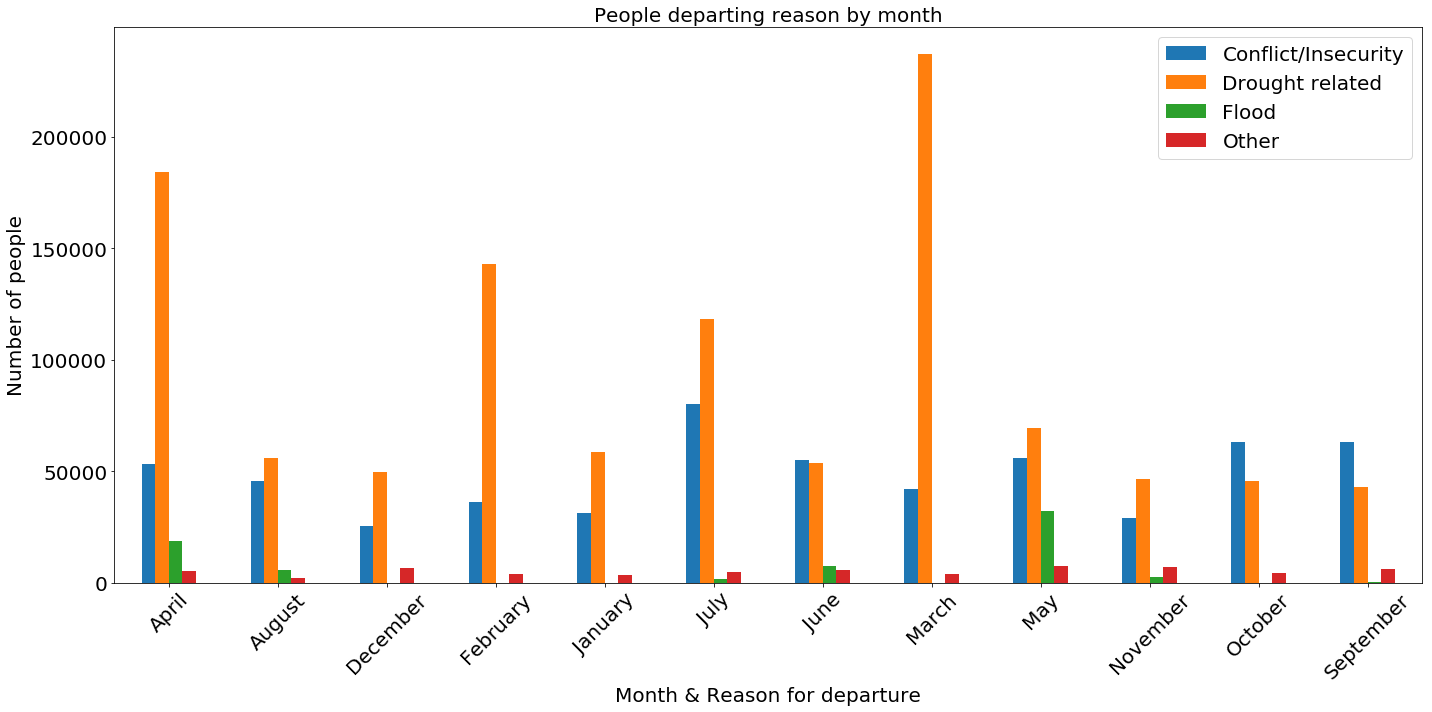

In [44]:
## Reasons people move by monthly average 
numbers_wo_mth_reason['number_of_people'].plot(kind='bar',figsize=(20, 10), fontsize=20)
plt.xlabel('Month & Reason for departure', fontsize=20)
plt.xticks(rotation=45)
plt.ylabel('Number of people', fontsize=20)
plt.title('People departing reason by month', fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()

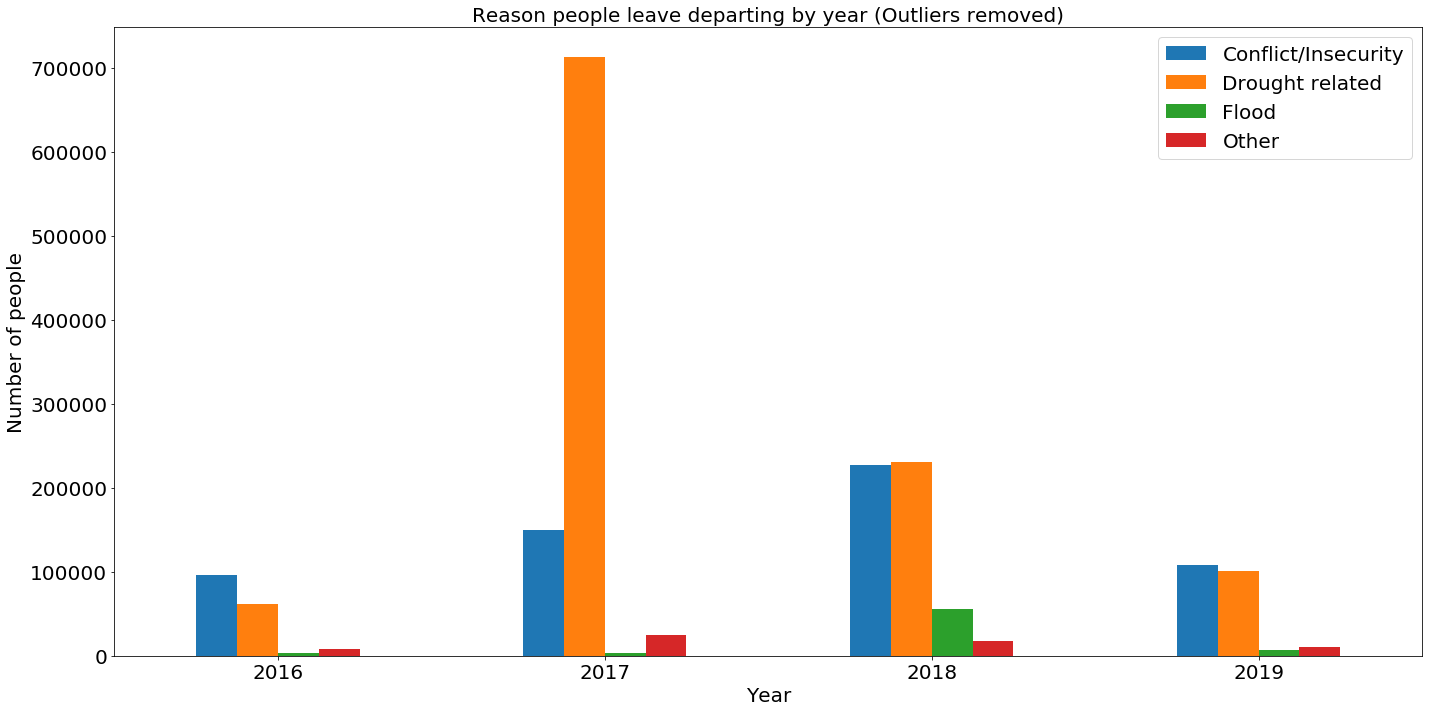

In [51]:
## What people arriving need by year
numbers_wo_yr_reason['number_of_people'].plot(kind='bar',figsize=(20, 10), fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.xticks(rotation=0)
plt.ylabel('Number of people', fontsize=20)
plt.title('Reason people leave departing by year (Outliers removed)', fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()

In [46]:
# Use geopy to get coordinates

In [47]:
arrival_regions = df_new.arr_reg.drop_duplicates()
arrival_regions

yr_wk
2016-01-10              Awdal
2016-01-17            Banadir
2016-01-24               Bari
2016-01-17                Bay
2016-01-17          Galgaduud
2016-01-24               Gedo
2016-01-17         Lower Juba
2016-01-10     Lower Shabelle
2016-01-17        Middle Juba
2016-01-10              Mudug
2016-01-17           Togdheer
2016-01-10    Woqooyi Galbeed
2016-02-21             Bakool
2016-02-07               Sool
2016-03-27    Middle Shabelle
2016-04-03             Hiraan
2017-01-15             Nugaal
2017-03-05             Sanaag
Name: arr_reg, dtype: category
Categories (18, object): [Awdal, Bakool, Banadir, Bari, ..., Sanaag, Sool, Togdheer, Woqooyi Galbeed]

In [48]:
## using geopy to extract latitude  / longitude data
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="displacements")
location = geolocator.geocode("Hiran, Somalia")
print(location.address)
print((location.latitude, location.longitude))

Hiiraan هيران, Soomaaliya الصومال
(3.9999468, 45.4998929)


In [49]:
def extract_coords(place):
    if place:
        if place == 'Hiraan':
            place = 'Hiran'
        location = geolocator.geocode(place + ", Somalia")
        if place not in arrival_regions_coords:
            if place == 'Hiran':
                place = 'Hiraan'
            arrival_regions_coords[place] = (location.latitude, location.longitude)
    return
arrival_regions_coords = {}
arrival_regions.apply(extract_coords)

yr_wk
2016-01-10    None
2016-01-17    None
2016-01-24    None
2016-01-17    None
2016-01-17    None
2016-01-24    None
2016-01-17    None
2016-01-10    None
2016-01-17    None
2016-01-10    None
2016-01-17    None
2016-01-10    None
2016-02-21    None
2016-02-07    None
2016-03-27    None
2016-04-03    None
2017-01-15    None
2017-03-05    None
Name: arr_reg, dtype: object

In [50]:
arrival_regions_coords

{'Awdal': (10.5000045, 43.4999956),
 'Bakool': (4.000003, 43.999993),
 'Banadir': (-0.36493, 42.5526),
 'Bari': (10.1903509, 50.1298044),
 'Bay': (8.3676771, 49.083416),
 'Galgaduud': (5.0, 47.0),
 'Gedo': (3.0, 42.0),
 'Hiraan': (3.9999468, 45.4998929),
 'Lower Juba': (0.0, 42.0),
 'Lower Shabelle': (1.8427539, 44.5937239),
 'Middle Juba': (1.4325937, 42.6559939),
 'Middle Shabelle': (3.0, 46.0),
 'Mudug': (6.6507279, 48.3009945),
 'Nugaal': (8.1666667, 49.0),
 'Sanaag': (10.0, 48.0),
 'Sool': (8.927923, 47.8494546),
 'Togdheer': (9.3333333, 45.416667),
 'Woqooyi Galbeed': (9.9275021, 44.4247057)}